In [7]:
import numpy as np


# Dot Product (Manual Implementation)
def dot_product_manually(A, B):
    result = 0
    for A_i, B_i in zip(A, B):
        result += A_i * B_i
    return result

# Dot Product (NumPy Implementation)
def dot_product_numpy(A, B):
    return np.dot(A, B)



# Euclidean Norm (Manual Implementation)
def euclidean_norm_manually(A):
    sum_of_squares = 0
    for element in A:
        sum_of_squares += element ** 2
    return sum_of_squares ** 0.5



# Euclidean Norm (NumPy Implementation)
def euclidean_norm_numpy(A):
    return np.linalg.norm(A)


# Main Program
def main():
    # Read vector dimension
    n = int(input("Enter number of dimensions: "))

    # Reading vector A
    print("Enter elements of vector A :")
    A = list(map(float, input().split()))

    # Reading vector B 
    print("Enter elements of vector B :")
    B = list(map(float, input().split()))

    # Dimension validation
    if len(A) != n or len(B) != n:
        print("Error: Number of elements must match the given dimension.")
        return

    manual_dot = dot_product_manually(A, B)
    numpy_dot = dot_product_numpy(A, B)

    print("\nResults of Dot Product:")
    print("Dot product manually :", manual_dot)
    print("Dot product using NumPy:", numpy_dot)


    manual_norm = euclidean_norm_manually(A)
    numpy_norm = euclidean_norm_numpy(A)

    print("\nResults of Euclidean Norm (Vector A):")
    print("Euclidean norm manually :", manual_norm)
    print("Euclidean norm using NumPy:", numpy_norm)

if __name__ == "__main__":
    main()



Enter elements of vector A :
Enter elements of vector B :

Results of Dot Product:
Dot product manually : 8.0
Dot product using NumPy: 8.0

Results of Euclidean Norm (Vector A):
Euclidean norm manually : 2.23606797749979
Euclidean norm using NumPy: 2.23606797749979


In [10]:
# A2

import pandas as pd
import numpy as np

def calculate_mean(data):
    return np.mean(data)

def calculate_variance(data):
    return np.var(data)

def calculate_standard_deviation(data):
    return np.std(data)

def dataset_statistics(X):
    mean_vec = np.mean(X, axis=0)
    var_vec = np.var(X, axis=0)
    std_vec = np.std(X, axis=0)
    return mean_vec, var_vec, std_vec

def class_centroid_and_spread(X, y, label):
    class_data = X[y == label]
    centroid = np.mean(class_data, axis=0)
    spread = np.std(class_data, axis=0)
    return centroid, spread

def interclass_distance(c1, c2):
    return np.linalg.norm(c1 - c2)

def main():
    df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

    mean_vec, var_vec, std_vec = dataset_statistics(X)

    c_rich, s_rich = class_centroid_and_spread(X, y, "RICH")
    c_poor, s_poor = class_centroid_and_spread(X, y, "POOR")

    distance = interclass_distance(c_rich, c_poor)

    print("Dataset Mean:", mean_vec)
    print("Dataset Variance:", var_vec)
    print("Dataset Std Dev:", std_vec)

    print("\nCentroid (RICH):", c_rich)
    print("Spread (RICH):", s_rich)

    print("\nCentroid (POOR):", c_poor)
    print("Spread (POOR):", s_poor)

    print("\nInterclass Distance:", distance)

if __name__ == "__main__":
    main()


Dataset Mean: [19.8  3.2  3.1]
Dataset Variance: [13.16  3.36  2.09]
Dataset Std Dev: [3.62767143 1.83303028 1.44568323]

Centroid (RICH): [20.          4.5         2.66666667]
Spread (RICH): [4.28174419 1.11803399 1.49071198]

Centroid (POOR): [19.5   1.25  3.75]
Spread (POOR): [2.29128785 0.4330127  1.08972474]

Interclass Distance: 3.4620963463068315


Mean: 19.8
Variance: 13.16


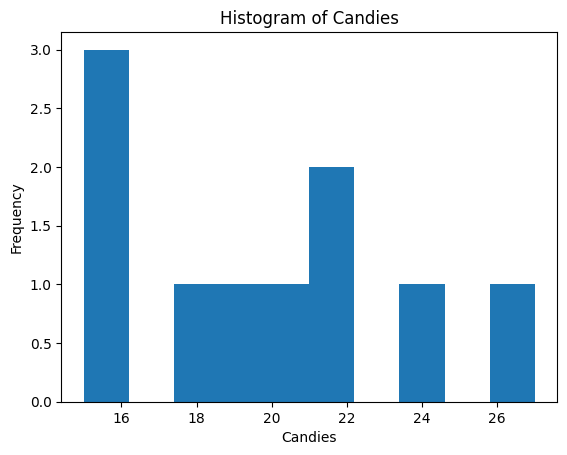

In [ ]:
# A3 : Histogram, Mean and Variance of a Feature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_feature(file_path):
    df = pd.read_excel(file_path, sheet_name="Purchase data")
    return df['Candies (#)'].values   # taking ONE feature


def calculate_mean(data):
    return np.mean(data)


def calculate_variance(data):
    return np.var(data)


def plot_histogram(data):
    hist, bins = np.histogram(data, bins=10)
    
    plt.hist(data, bins=10)
    plt.xlabel("Candies")
    plt.ylabel("Frequency")
    plt.title("Histogram of Candies")
    plt.show()

    return hist, bins


def main():
    file_path = "Lab Session Data.xlsx"

    feature = load_feature(file_path)

    mean_value = calculate_mean(feature)
    variance_value = calculate_variance(feature)

    print("Mean:", mean_value)
    print("Variance:", variance_value)

    plot_histogram(feature)


if __name__ == "__main__":
    main()


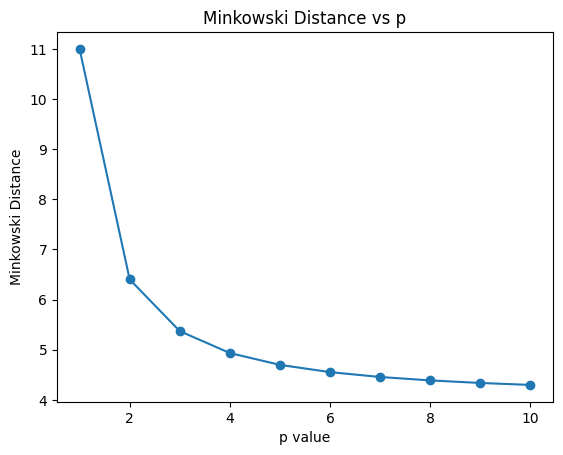

In [12]:
# A4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def minkowski_distance(v1, v2, p):
    total = 0
    for i in range(len(v1)):
        total += abs(v1[i] - v2[i]) ** p
    return total ** (1 / p)

def main():
    df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values

    v1 = X[0]
    v2 = X[1]

    distances = []
    for p in range(1, 11):
        distances.append(minkowski_distance(v1, v2, p))

    plt.plot(range(1, 11), distances, marker='o')
    plt.xlabel("p value")
    plt.ylabel("Minkowski Distance")
    plt.title("Minkowski Distance vs p")
    plt.show()

if __name__ == "__main__":
    main()


In [13]:
# A5

import pandas as pd
from scipy.spatial.distance import minkowski

def minkowski_manual(v1, v2, p):
    s = 0
    for i in range(len(v1)):
        s += abs(v1[i] - v2[i]) ** p
    return s ** (1 / p)

def main():
    df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")
    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values

    manual = minkowski_manual(X[0], X[1], 3)
    scipy_val = minkowski(X[0], X[1], 3)

    print("Manual Minkowski:", manual)
    print("SciPy Minkowski:", scipy_val)

if __name__ == "__main__":
    main()


Manual Minkowski: 5.371685354944832
SciPy Minkowski: 5.371685354944832


In [ ]:
# A6

import pandas as pd
from sklearn.model_selection import train_test_split

def main():
    df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

    X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
    y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3
    )

    print("Train size:", len(X_train))
    print("Test size:", len(X_test))

if __name__ == "__main__":
    main()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("A7 Result")
print("---------")
print("Training kNN classifier with k = 3")

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("\nA8 Result")
print("---------")
print("Accuracy of kNN Classifier:")
print(knn.score(X_test, y_test))

print("\nA9 Result")
print("---------")
print("Predicted classes for test data:")
print(knn.predict(X_test))


A7 Result
---------
Training kNN classifier with k = 3

A8 Result
---------
Accuracy of kNN Classifier:
1.0

A9 Result
---------
Predicted classes for test data:
['POOR' 'RICH' 'RICH']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def knn_manual(X_train, y_train, test_point, k):
    distances = []

    for i in range(len(X_train)):
        d = np.linalg.norm(X_train[i] - test_point)
        distances.append((d, y_train[i]))

    distances.sort(key=lambda x: x[0])
    nearest = distances[:k]

    labels = [label for _, label in nearest]
    return max(set(labels), key=labels.count)

print("A10 Result")
print("----------")
print("Manual kNN predictions (k=3):")

for i in range(len(X_test)):
    print(knn_manual(X_train, y_train, X_test[i], 3))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

def knn_manual(X_train, y_train, test_point, k):
    distances = []

    for i in range(len(X_train)):
        d = np.linalg.norm(X_train[i] - test_point)
        distances.append((d, y_train[i]))

    distances.sort(key=lambda x: x[0])
    nearest = distances[:k]

    labels = [label for _, label in nearest]
    return max(set(labels), key=labels.count)

print("A10 Result")
print("----------")
print("Manual kNN predictions (k=3):")

for i in range(len(X_test)):
    print(knn_manual(X_train, y_train, X_test[i], 3))


A11 Result
----------
Accuracy for different values of k:
k = 1 Accuracy = 1.0
k = 2 Accuracy = 0.6666666666666666
k = 3 Accuracy = 0.6666666666666666
k = 4 Accuracy = 0.6666666666666666
k = 5 Accuracy = 0.6666666666666666
k = 6 Accuracy = 0.3333333333333333
k = 7 Accuracy = 0.6666666666666666


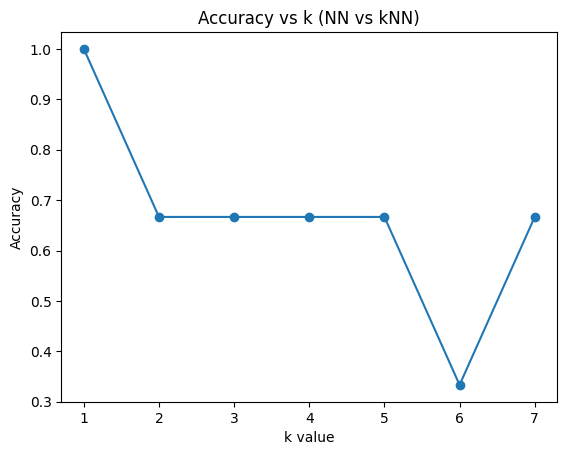

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = df['Payment (Rs)'].apply(
    lambda x: "RICH" if x > 200 else "POOR"
).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

accuracy = []

print("A11 Result")
print("----------")
print("Accuracy for different values of k:")

# k should not exceed number of training samples
max_k = len(X_train)

for k in range(1, max_k + 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracy.append(acc)
    print("k =", k, "Accuracy =", acc)

# Plot Accuracy vs k
plt.plot(range(1, max_k + 1), accuracy, marker='o')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (NN vs kNN)")
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Load data
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="Purchase data")

X = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']].values
y = df['Payment (Rs)'].apply(lambda x: "RICH" if x > 200 else "POOR").values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train kNN (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# ---------------- A12 ----------------
print("A12 Result")
print("---------")
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)
print(cm)

# ---------------- A13 ----------------
print("\nA13 Result")
print("---------")

tp = cm[1][1]
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# ---------------- A14 ----------------
print("\nA14 Result")
print("---------")
print("Matrix Inversion Technique Result:")

y_numeric = np.array([1 if label == "RICH" else 0 for label in y])
weights = np.linalg.pinv(X) @ y_numeric

print("Weight vector:", weights)


A12 Result
---------
Confusion Matrix:
[[0 1]
 [1 1]]

A13 Result
---------
Accuracy: 0.3333333333333333
Precision: 0.5
Recall: 0.5
F1 Score: 0.5

A14 Result
---------
Matrix Inversion Technique Result:
Weight vector: [-0.0196597   0.26431172  0.04554979]
